# <center>Machine Learning Assignment-1</center>

# Group No: 91

# Group Members:
1. Santosh Uttam Kavitake (2022DA04569)
2. Bagavath P (2022DA04561)
3. Sri Krishna Chaitanya P (2022DA04592)

# Problem Statement - 12   
# Bug Prediction Analysis

# PART - A

# 1. Import Libraries & Dataset


<b>a. Download the dataset</b>

In [1]:
# Downloading the Data Set
import requests
import pandas as pd
# List of bug metrics urls from 5 different softwares
urls = [
    "https://bug.inf.usi.ch/data/eclipse/bug-metrics.csv",
    "https://bug.inf.usi.ch/data/pde/bug-metrics.csv",
    "https://bug.inf.usi.ch/data/equinox/bug-metrics.csv",
    "https://bug.inf.usi.ch/data/lucene/bug-metrics.csv",
    "https://bug.inf.usi.ch/data/mylyn/bug-metrics.csv"
]

# Create a list of dataframes
dataframes = [pd.read_csv(filename) for filename in urls]

# Concatenate the dataframes
merged_dataframe = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new CSV file
merged_dataframe.to_csv("bug_metrics.csv", index=False)

# Creating bug-metrics dataframe
data = pd.read_csv("bug_metrics.csv", sep=';')
df = pd.DataFrame(data)
df

,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,3,2,0,0,0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,55,48,6,4,2,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,3,3,0,0,0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,15,13,1,1,0,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...
5366,org::eclipse::mylyn::internal::wikitext::tasks...,1,0,0,0,0,0,0,0,0,0,
5367,org::eclipse::mylyn::tasks::core::data::TaskDa...,4,2,0,0,3,0,0,0,0,0,
5368,org::eclipse::mylyn::internal::wikitext::ui::e...,4,4,0,0,0,1,0,0,0,0,
5369,org::eclipse::mylyn::internal::tasks::ui::noti...,13,3,0,0,7,0,0,0,0,0,


<b>b.	Import the required libraries</b>

In [2]:
# Importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 2.	Data Visualization and Exploration



<b>a.	Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.</b>

In [3]:
# Printing the first 5 records
df.head()

,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,3,2,0,0,0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,0,0,0,0,0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,55,48,6,4,2,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,3,3,0,0,0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,15,13,1,1,0,0,0,0,0,0,


In [4]:
# Printing the last 5 records
df.tail()

,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
5366,org::eclipse::mylyn::internal::wikitext::tasks...,1,0,0,0,0,0,0,0,0,0,
5367,org::eclipse::mylyn::tasks::core::data::TaskDa...,4,2,0,0,3,0,0,0,0,0,
5368,org::eclipse::mylyn::internal::wikitext::ui::e...,4,4,0,0,0,1,0,0,0,0,
5369,org::eclipse::mylyn::internal::tasks::ui::noti...,13,3,0,0,7,0,0,0,0,0,
5370,org::eclipse::mylyn::tasks::core::data::TaskCo...,6,5,0,0,6,0,0,0,0,0,


<b>b.	Print the description and shape of the dataset</b>

In [5]:
# Describing the Dataframe
df.describe()

,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,6.550922,4.509961,0.417985,0.156023,1.596165,0.259914,0.041147,0.021225,0.003724,0.007261
std,13.107142,10.250986,1.471557,0.654344,4.358666,0.880067,0.266681,0.158895,0.060914,0.089189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,232.000000,200.000000,38.000000,15.000000,85.000000,28.000000,8.000000,3.000000,1.000000,2.000000


In [6]:
##Statistical Description for all columns
df.describe(include='all')

,classname,numberOfBugsFoundUntil:,numberOfNonTrivialBugsFoundUntil:,numberOfMajorBugsFoundUntil:,numberOfCriticalBugsFoundUntil:,numberOfHighPriorityBugsFoundUntil:,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
count,5371,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371
unique,5371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,org::eclipse::jdt::internal::core::search::ind...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5371
mean,NaN,6.550922,4.509961,0.417985,0.156023,1.596165,0.259914,0.041147,0.021225,0.003724,0.007261,NaN
std,NaN,13.107142,10.250986,1.471557,0.654344,4.358666,0.880067,0.266681,0.158895,0.060914,0.089189,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,7.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [7]:
# Printing the shape of the dataframe
df.shape

(5371, 12)

In [8]:
#To remove the empty spaces in the column names
df.columns = df.columns.str.replace(' ', '')

#To remove the : in the column names
df.columns = df.columns.str.replace(':', '')
df.columns.tolist()

['classname',
 'numberOfBugsFoundUntil',
 'numberOfNonTrivialBugsFoundUntil',
 'numberOfMajorBugsFoundUntil',
 'numberOfCriticalBugsFoundUntil',
 'numberOfHighPriorityBugsFoundUntil',
 'bugs',
 'nonTrivialBugs',
 'majorBugs',
 'criticalBugs',
 'highPriorityBugs',
 '']

<b>c.	Provide appropriate visualization to get an insight about the dataset.</b>

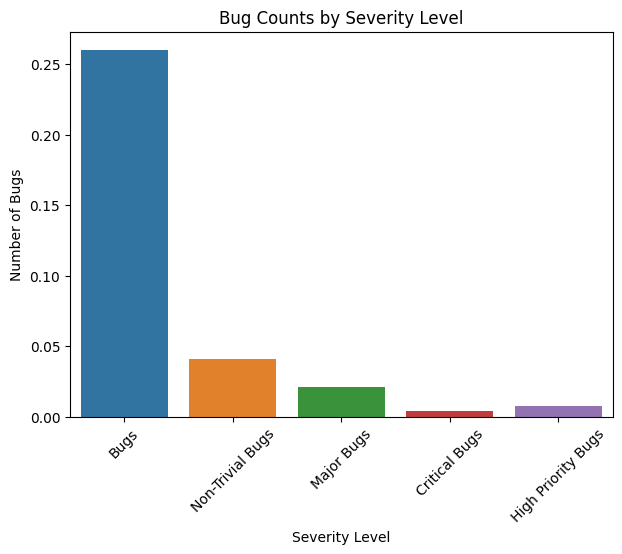

In [9]:
# Bar plot of bug counts for different severity levels
severity_columns = ['bugs', 'nonTrivialBugs', 'majorBugs', 'criticalBugs', 'highPriorityBugs']
severity_labels = ['Bugs', 'Non-Trivial Bugs', 'Major Bugs', 'Critical Bugs', 'High Priority Bugs']
plt.figure(figsize=(7, 5))
sns.barplot(data=df[severity_columns], errorbar=None)
plt.xticks(range(len(severity_columns)), severity_labels, rotation=45)
plt.title('Bug Counts by Severity Level')
plt.ylabel('Number of Bugs')
plt.xlabel('Severity Level')
plt.show()

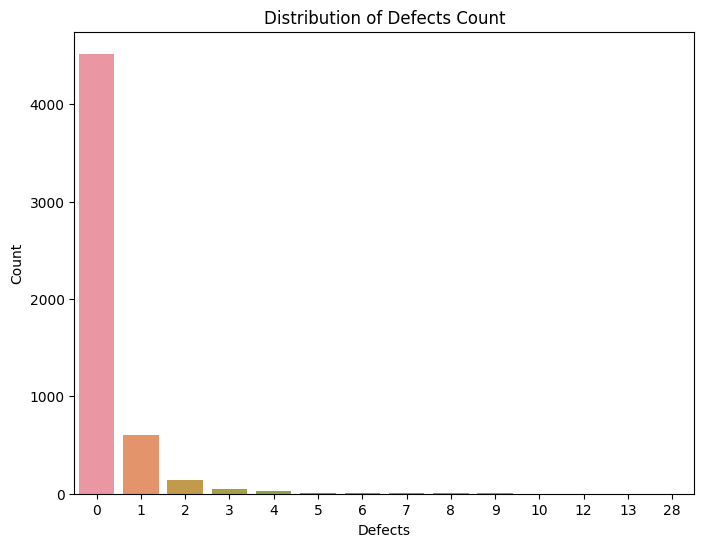

In [10]:
# Distribution of the bugs count
plt.figure(figsize=(8, 6))
sns.countplot(x='bugs', data=df)
plt.title('Distribution of Defects Count')
plt.xlabel('Defects')
plt.ylabel('Count')
plt.show()

<ipython-input-11-24aa990fd4b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


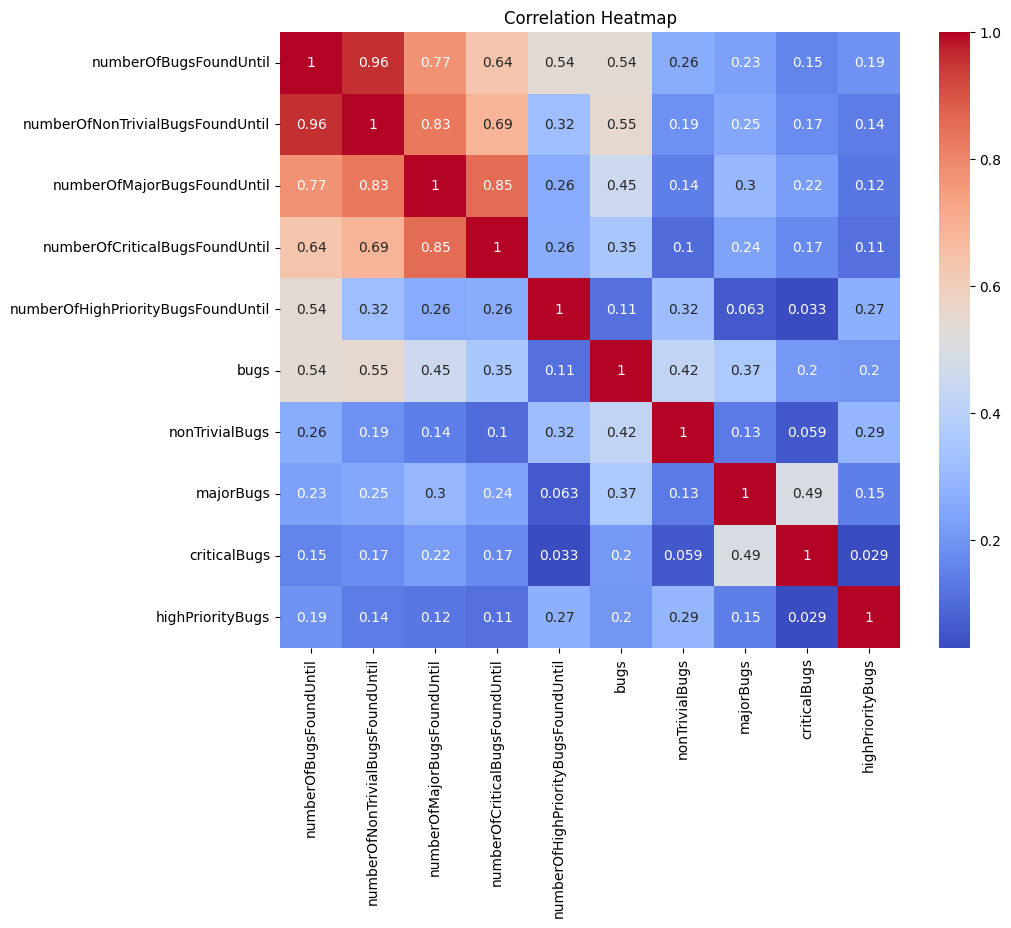

In [11]:
# Correlation Heat Map
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

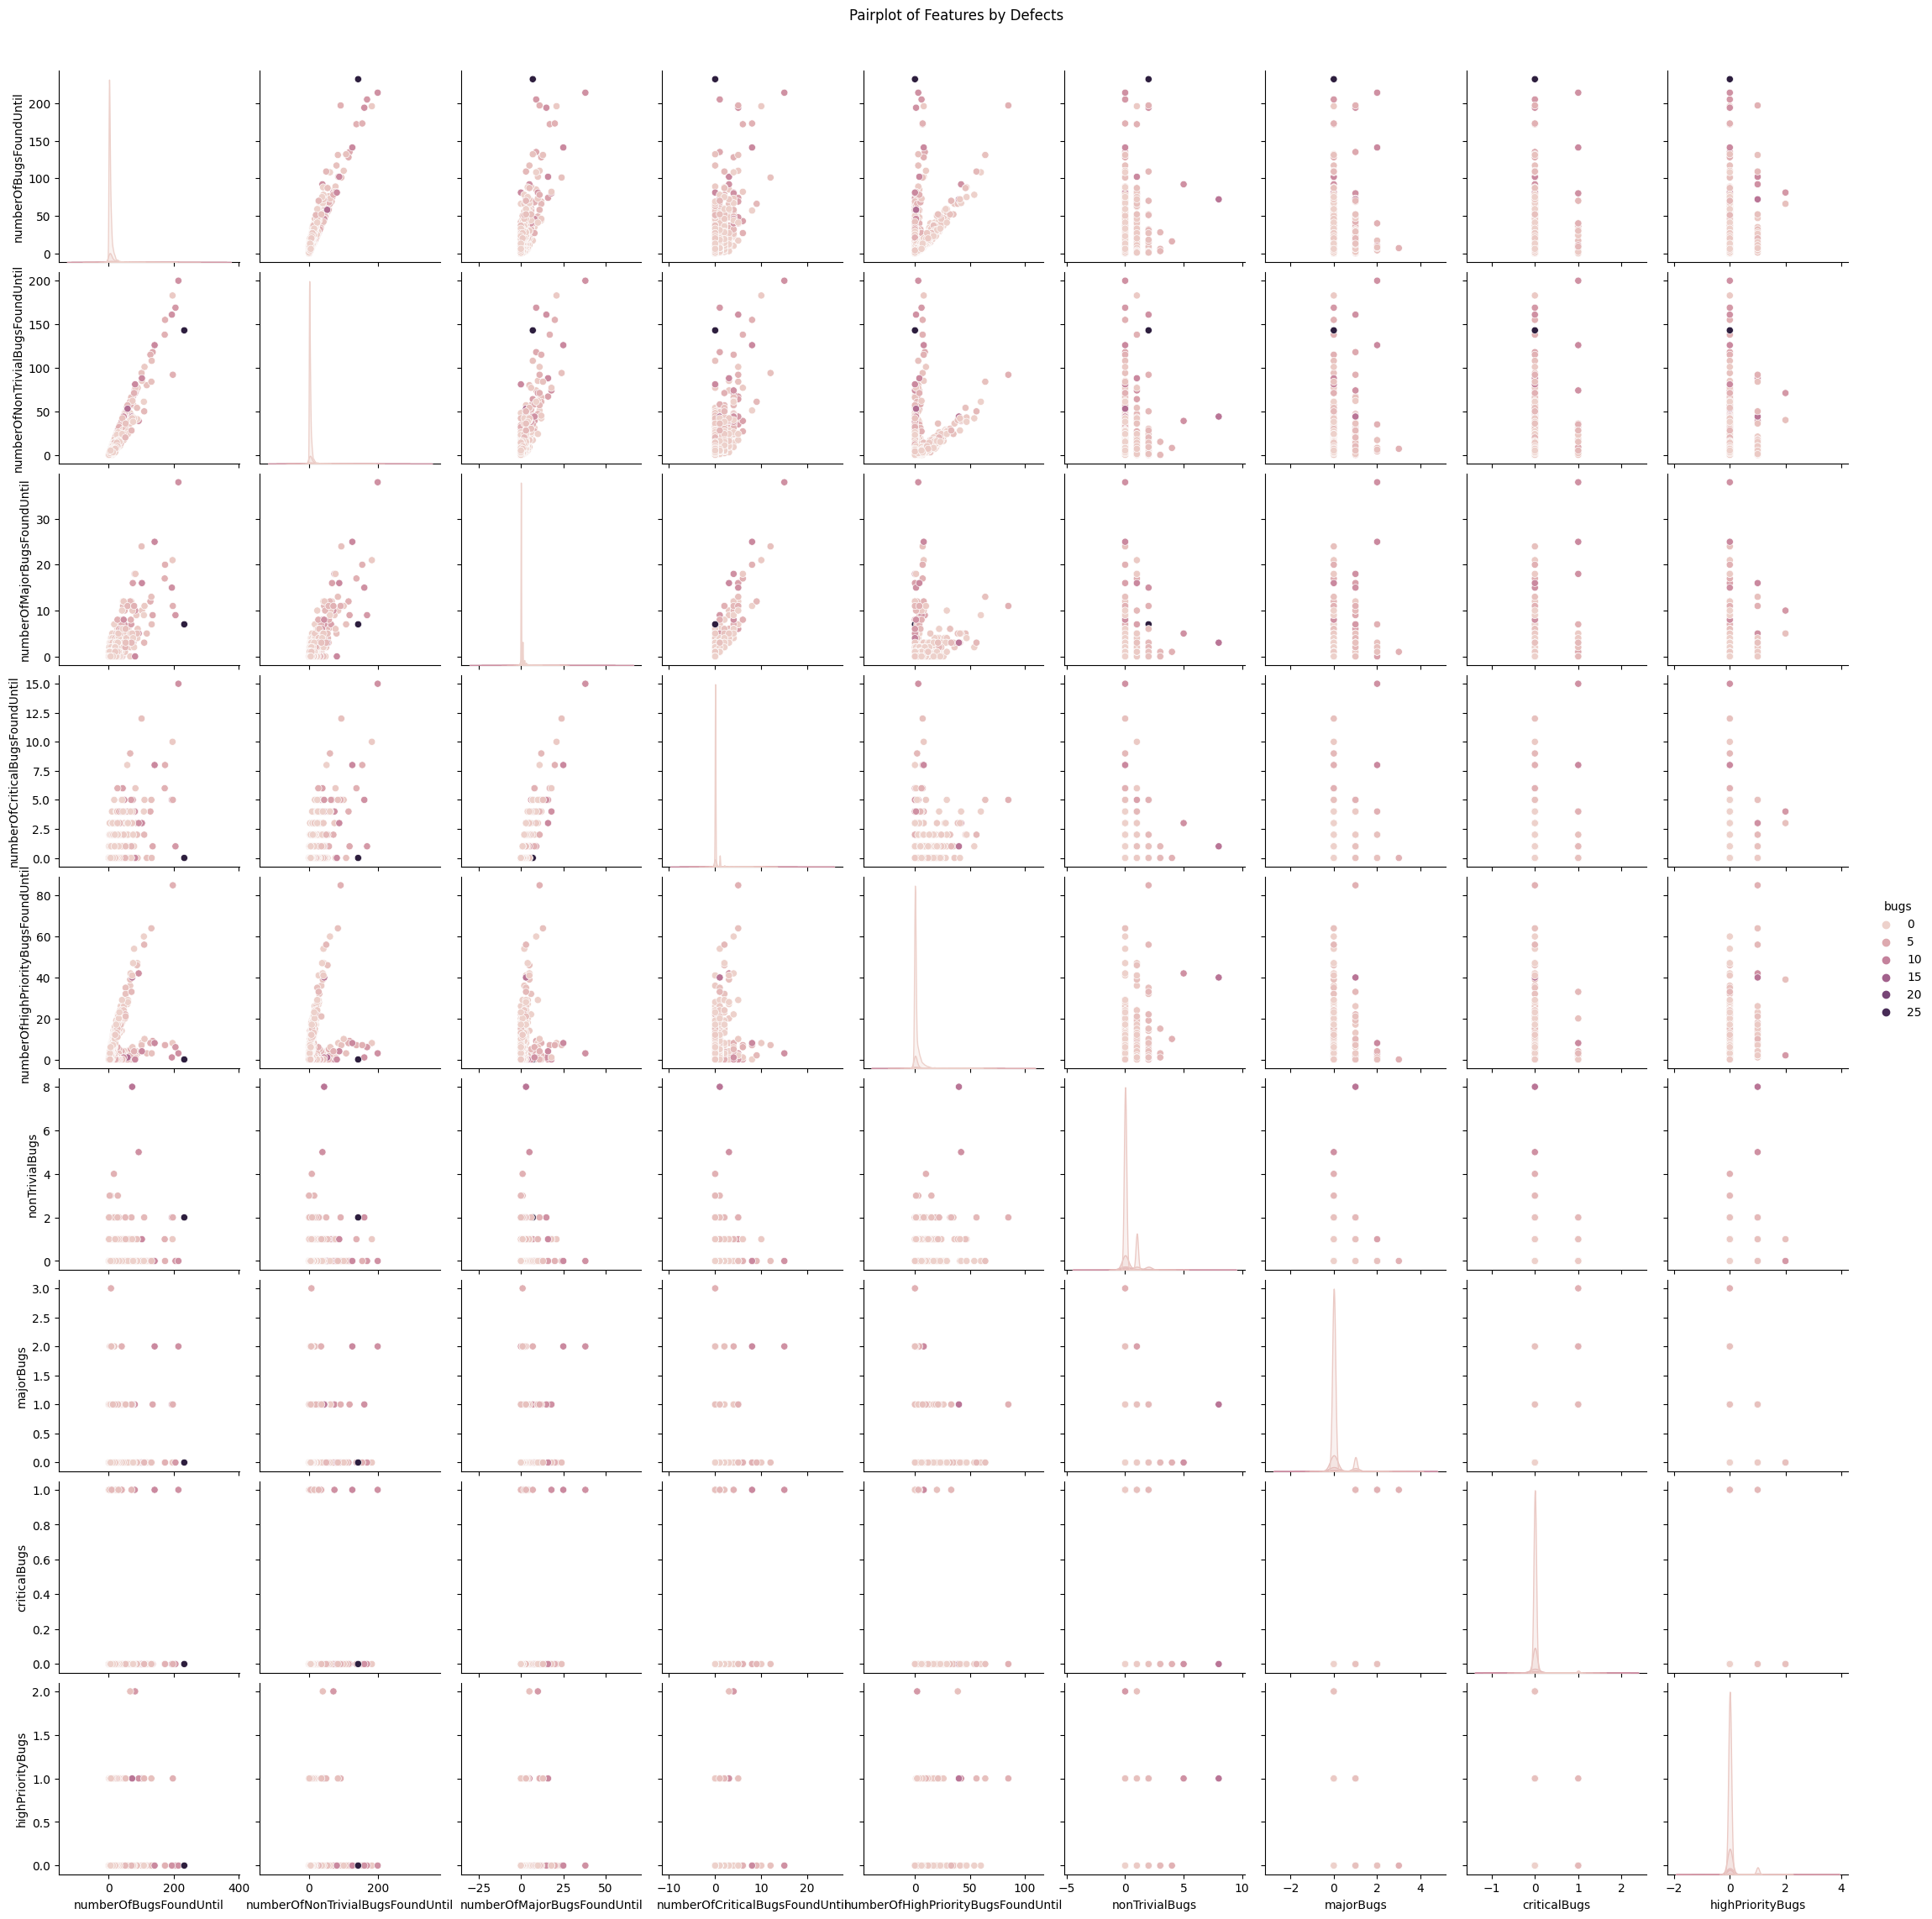

In [12]:
# Pair Plot Visualization
sns.pairplot(df, hue='bugs', diag_kind='kde')
plt.suptitle('Pairplot of Features by Defects', y=1.02)
plt.show()

<b>d.	Try exploring the data and see what insights can be drawn from the dataset</b>

**Bar Plot of Bug Counts by Severity Level:** This bar plot shows the counts of bugs at different severity levels. Each bar represents the count of bugs for a specific severity level, providing insights into the distribution of bugs by severity.

**Distribution of Defects:** The "Distribution of Defects Count" plot shows the count of different defect categories. This gives an overview of how defects are distributed across the dataset. It appears that the dataset contains more non-defective cases compared to defective ones. Over 80% we have bug free classes.

**Correlation Heatmap:** The "Correlation Heatmap" visualizes the correlation between different numerical features in the dataset. It helps identify potential relationships between features. Keep in mind that a correlation close to 1 or -1 indicates a strong linear relationship. For example, We have 0.54 correlation between bugs and numberOfBugsFoundUntil(historical). We have 0.55 correlation between bugs and numberOfNonTrivialFoundUntil(historical).

**Pairplot:** The "Pairplot of Features by Defects" provides scatter plots for pairs of features, differentiated by the target variable (bugs). This visualization can help you identify trends and patterns in the data based on the target variable. We do not see any obvious trend here.

# 3.	Data Pre-processing and cleaning

**a.	Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.**

In [13]:
# Missing Data
# Print out the missing rows
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [classname, numberOfBugsFoundUntil, numberOfNonTrivialBugsFoundUntil, numberOfMajorBugsFoundUntil, numberOfCriticalBugsFoundUntil, numberOfHighPriorityBugsFoundUntil, bugs, nonTrivialBugs, majorBugs, criticalBugs, highPriorityBugs, ]
Index: []


In [14]:
# Handle missing values
df.dropna(inplace=True)  # Drop rows with missing values

In [15]:
# Drop the extra column at the last '' which has no values and no use for this project.
df = df.drop('', axis=1)

In [16]:
# Remove duplicate data
df = df.drop_duplicates()

In [17]:
# Handle outliers (using a simple method for demonstration)
def handle_outliers(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(column, lower_bound, upper_bound)

# Apply outlier handling to relevant columns
columns_to_handle_outliers = ['numberOfBugsFoundUntil', 'numberOfNonTrivialBugsFoundUntil']
for col in columns_to_handle_outliers:
    df[col] = handle_outliers(df[col])

df

,classname,numberOfBugsFoundUntil,numberOfNonTrivialBugsFoundUntil,numberOfMajorBugsFoundUntil,numberOfCriticalBugsFoundUntil,numberOfHighPriorityBugsFoundUntil,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs
0,org::eclipse::jdt::internal::core::search::ind...,3,2.0,0,0,0,0,0,0,0,0
1,org::eclipse::jdt::internal::compiler::codegen...,0,0.0,0,0,0,0,0,0,0,0
2,org::eclipse::jdt::internal::compiler::ast::AS...,16,8.5,6,4,2,1,0,0,0,0
3,org::eclipse::jdt::internal::compiler::lookup:...,3,3.0,0,0,0,0,0,0,0,0
4,org::eclipse::jdt::internal::eval::CodeSnippet...,15,8.5,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5366,org::eclipse::mylyn::internal::wikitext::tasks...,1,0.0,0,0,0,0,0,0,0,0
5367,org::eclipse::mylyn::tasks::core::data::TaskDa...,4,2.0,0,0,3,0,0,0,0,0
5368,org::eclipse::mylyn::internal::wikitext::ui::e...,4,4.0,0,0,0,1,0,0,0,0
5369,org::eclipse::mylyn::internal::tasks::ui::noti...,13,3.0,0,0,7,0,0,0,0,0


**b.	Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.**

In [18]:
# Apply Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['numberOfBugsFoundUntil', 'numberOfNonTrivialBugsFoundUntil', 'numberOfMajorBugsFoundUntil', 'numberOfCriticalBugsFoundUntil', 'numberOfHighPriorityBugsFoundUntil']])
print(scaled_data)

[[-0.36996578 -0.31691884 -0.28406952 -0.23846415 -0.36623896]
 [-0.9817534  -1.02689635 -0.28406952 -0.23846415 -0.36623896]
 [ 2.28111392  1.99050807  3.79362501  5.87509642  0.09265978]
 ...
 [-0.16603657  0.39305867 -0.28406952 -0.23846415 -0.36623896]
 [ 1.66932629  0.03806992 -0.28406952 -0.23846415  1.23990664]
 [ 0.24182184  0.74804743 -0.28406952 -0.23846415  1.01045727]]


In [19]:
# Apply Min-Max Normalization
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(df[['bugs', 'nonTrivialBugs', 'majorBugs', 'criticalBugs', 'highPriorityBugs']])
print(normalized_data)

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.03571429 0.         0.         0.         0.        ]
 ...
 [0.03571429 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


**c.	Do the correlational analysis on the dataset. Provide a visualization for the same**

<ipython-input-20-706a3d0648aa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


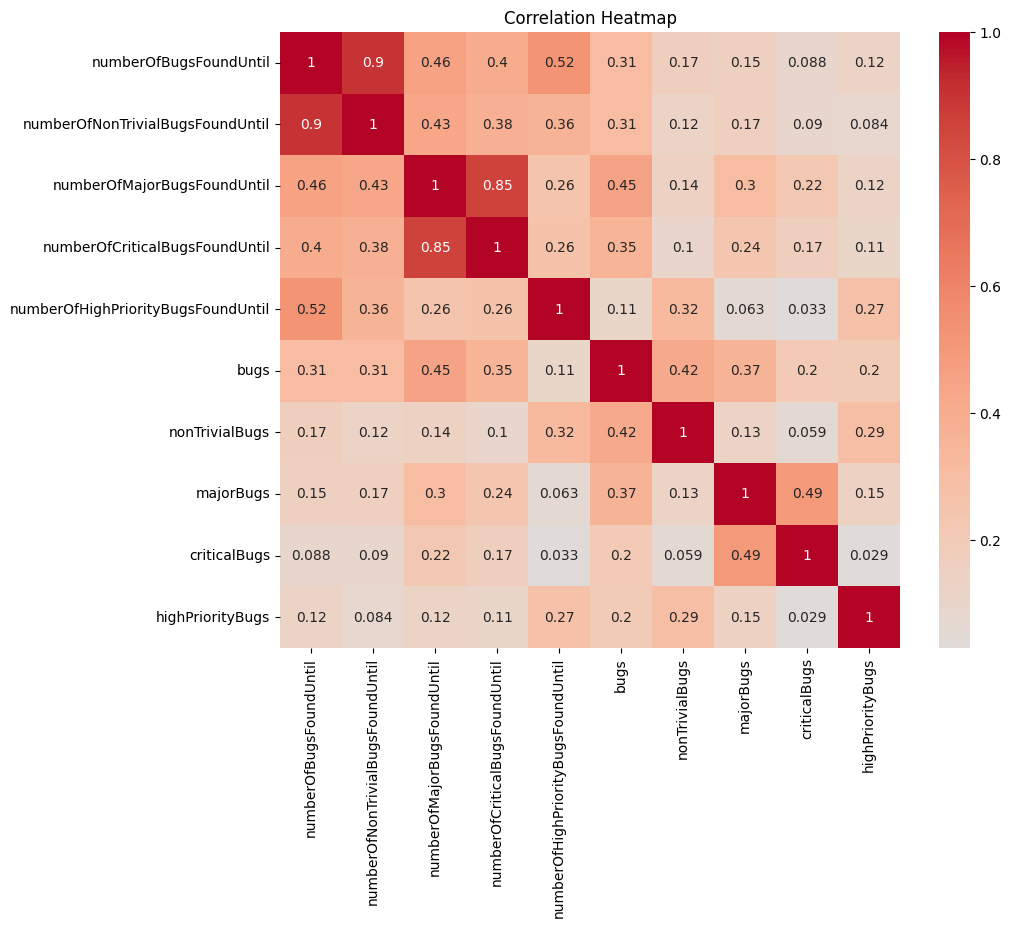

In [20]:
# Correlational analysis
correlation_matrix = df.corr()

# Visualization of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 4.	Data Preparation
**a.	Do the final feature selection and extract them into Column X and the class label into Column into Y**

In [21]:
# Creating the target variable: 1 for incorrectly fixed, 0 for correctly fixed
df['DefectStatus'] = np.where(df['bugs'] > 0.4, 1, 0)

In [22]:
# Select the features we want to include
selected_features = ['numberOfBugsFoundUntil', 'numberOfNonTrivialBugsFoundUntil', 'numberOfMajorBugsFoundUntil', 'numberOfCriticalBugsFoundUntil', 'numberOfHighPriorityBugsFoundUntil']
X = df[selected_features]  # Feature matrix
y = df['DefectStatus']  # Target vector

We have selected the features to include in the analysis. In this example, I'm assuming all available features except for 'classname' in the selected_features list.
Created the feature matrix X using the selected features.
Created the target vector y using the 'DefectStatus' column.

**b.	Split the dataset into training and test sets.**

In [23]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4296, 5)
X_test shape: (1075, 5)
y_train shape: (4296,)
y_test shape: (1075,)


In above we used train_test_split from sklearn.model_selection to split the data into training and test sets. we've chosen a test size of 20% of the total data, and we are using a fixed random state for reproducibility.
Printed the shapes of the splits to verify the dimensions of the training and test sets.
Replaced the data columns and features with the actual data. This code will help us finalize our feature selection, created the feature matrix and target vector, and splitted the dataset for training and testing purposes.







# **Part B**
# 1.	Model Building
**a.	Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.**

Here we are using four common machine learning algorithms:
*   Logistic Regression
*   Random Forest
*   Support Vector Machine (SVM)
*   Decision Tree





In [24]:
# Model 1: Logistic Regression
logreg_model = LogisticRegression(max_iter=3000, random_state=42)

# Train Model
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000, random_state=42)

In [25]:
# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
#  Model 3: Support Vector Machine
svm_model = SVC(kernel='linear', random_state=42)

# Train Model
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [27]:
#  Model 4: Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train Model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**b.	 Train the model and print the training accuracy and loss values.**

In [28]:
# Model 1: Logistic Regression

# Make Predictions
logistic_regression_train_pred = logreg_model.predict(X_train)
logistic_regression_train_pred_proba = logreg_model.predict_proba(X_train)

# Accuracy Calculation
logistic_regression_accuracy = accuracy_score(y_train, logistic_regression_train_pred)
print("Logistic Regression Accuracy:", logistic_regression_accuracy)

# Log Loss Calculation
logistic_regression_log_loss = log_loss(y_train, logistic_regression_train_pred_proba)
print("Logistic Regression Log Loss:", logistic_regression_log_loss)

Logistic Regression Accuracy: 0.8533519553072626
Logistic Regression Log Loss: 0.3806746489881415


In [29]:
# Model 2: Random Forest

# Make Predictions
random_forest_train_pred = rf_model.predict(X_train)

# Accuracy Calculation
random_forest_accuracy = accuracy_score(y_train, random_forest_train_pred)
print("Random Forest Training Accuracy:", random_forest_accuracy)

Random Forest Training Accuracy: 0.8912942271880819


In [30]:
# Model 3: Support Vector Machine

# Make Predictions
svm_train_pred = svm_model.predict(X_train)

# Accuracy Calculation
svm_accuracy = accuracy_score(y_train, svm_train_pred)
print("SVM Training Accuracy:", svm_accuracy)

# Calculate precision, recall, and F1-score
svm_precision = precision_score(y_train, svm_train_pred)
svm_recall = recall_score(y_train, svm_train_pred)
svm_f1 = f1_score(y_train, svm_train_pred)

print("SVM Precision Score:", svm_precision)
print("SVM Recall Score:", svm_recall)
print("SVM F1 Score:", svm_f1)

SVM Training Accuracy: 0.8470670391061452
SVM Precision Score: 0.9615384615384616
SVM Recall Score: 0.03671071953010279
SVM F1 Score: 0.07072135785007073


In [31]:
#  Model 4: Decision Tree

# Make Predictions
decision_tree_train_pred = decision_tree_model.predict(X_train)

# Accuracy Calculation
decision_tree_accuracy = accuracy_score(y_train, svm_train_pred)
print("Decision Tree Training Accuracy:", decision_tree_accuracy)

# Calculate precision, recall, and F1-score
decision_tree_precision = precision_score(y_train, svm_train_pred)
decision_tree_recall = recall_score(y_train, svm_train_pred)
decision_tree_f1 = f1_score(y_train, svm_train_pred)

print("Decision Tree Precision Score:", decision_tree_precision)
print("Decision Tree Recall Score:", decision_tree_recall)
print("Decision Tree F1 Score:", svm_f1)

Decision Tree Training Accuracy: 0.8470670391061452
Decision Tree Precision Score: 0.9615384615384616
Decision Tree Recall Score: 0.03671071953010279
Decision Tree F1 Score: 0.07072135785007073


# 2.	Performance Evaluation
**a.	Print the confusion matrix. Provide appropriate analysis for the same**

In [32]:
# Model 1: Logistic Regression
logistic_regression_test_pred = logreg_model.predict(X_test)
logistic_regression_conf_matrix = confusion_matrix(y_test, logistic_regression_test_pred)
print("Logistic Regression Confusion Matrix:\n", logistic_regression_conf_matrix)
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_regression_test_pred))

Logistic Regression Confusion Matrix:
 [[888  15]
 [150  22]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       903
           1       0.59      0.13      0.21       172

    accuracy                           0.85      1075
   macro avg       0.73      0.56      0.56      1075
weighted avg       0.81      0.85      0.80      1075



In [33]:
# Model 2: Random Forest
random_forest_test_pred = rf_model.predict(X_test)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_test_pred)
print("Random Forest Confusion Matrix:\n", random_forest_conf_matrix)
print("Random Forest Classification Report:\n", classification_report(y_test, random_forest_test_pred))

Random Forest Confusion Matrix:
 [[865  38]
 [129  43]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       903
           1       0.53      0.25      0.34       172

    accuracy                           0.84      1075
   macro avg       0.70      0.60      0.63      1075
weighted avg       0.82      0.84      0.82      1075



In [34]:
# Model 3: Support Vector Machine
svm_test_pred = svm_model.predict(X_test)
svm_conf_matrix = confusion_matrix(y_test, svm_test_pred)
print("SVM Confusion Matrix:\n", svm_conf_matrix)
print("SVM Classification Report:\n", classification_report(y_test, svm_test_pred))

SVM Confusion Matrix:
 [[902   1]
 [167   5]]
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       903
           1       0.83      0.03      0.06       172

    accuracy                           0.84      1075
   macro avg       0.84      0.51      0.49      1075
weighted avg       0.84      0.84      0.78      1075



In [35]:
# Model 4: Decision Tree
decision_tree_test_pred = decision_tree_model.predict(X_test)
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_test_pred)
print("Decision Tree Confusion Matrix:\n", decision_tree_conf_matrix)
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_test_pred))

Decision Tree Confusion Matrix:
 [[855  48]
 [137  35]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       903
           1       0.42      0.20      0.27       172

    accuracy                           0.83      1075
   macro avg       0.64      0.58      0.59      1075
weighted avg       0.79      0.83      0.80      1075



**b.	Do the prediction for the test data and display the results for the inference.**

In [36]:
# Model 1: Logistic Regression

# Make predictions on the test data
prediction = logreg_model.predict(X_test)

# Randomly select 50 indices from the test set
random_indices = random.sample(range(len(y_test)), 50)

# Print predictions and inferences for the randomly selected indices
for i in random_indices:
    print(f"Index: {i}, Actual: {y_test.iloc[i]}, Predicted: {prediction[i]}")

Index: 392, Actual: 0, Predicted: 0
Index: 133, Actual: 0, Predicted: 0
Index: 729, Actual: 0, Predicted: 0
Index: 283, Actual: 0, Predicted: 0
Index: 506, Actual: 0, Predicted: 0
Index: 230, Actual: 0, Predicted: 0
Index: 999, Actual: 0, Predicted: 0
Index: 425, Actual: 0, Predicted: 0
Index: 15, Actual: 1, Predicted: 0
Index: 711, Actual: 0, Predicted: 0
Index: 614, Actual: 0, Predicted: 0
Index: 727, Actual: 0, Predicted: 0
Index: 99, Actual: 0, Predicted: 0
Index: 1037, Actual: 0, Predicted: 0
Index: 706, Actual: 0, Predicted: 0
Index: 360, Actual: 0, Predicted: 0
Index: 341, Actual: 0, Predicted: 0
Index: 37, Actual: 0, Predicted: 0
Index: 725, Actual: 0, Predicted: 0
Index: 991, Actual: 0, Predicted: 0
Index: 667, Actual: 0, Predicted: 0
Index: 4, Actual: 0, Predicted: 0
Index: 956, Actual: 0, Predicted: 0
Index: 1056, Actual: 1, Predicted: 0
Index: 793, Actual: 0, Predicted: 0
Index: 193, Actual: 1, Predicted: 0
Index: 518, Actual: 0, Predicted: 0
Index: 378, Actual: 0, Predicte

In [37]:
# Model 2: Random Forest

# Make predictions on the test data
prediction = rf_model.predict(X_test)

# Randomly select 50 indices from the test set
random_indices = random.sample(range(len(y_test)), 50)

# Print predictions and inferences for the randomly selected indices
for i in random_indices:
    print(f"Index: {i}, Actual: {y_test.iloc[i]}, Predicted: {prediction[i]}")

Index: 741, Actual: 0, Predicted: 0
Index: 149, Actual: 0, Predicted: 0
Index: 11, Actual: 0, Predicted: 0
Index: 513, Actual: 0, Predicted: 0
Index: 137, Actual: 0, Predicted: 0
Index: 686, Actual: 0, Predicted: 0
Index: 894, Actual: 0, Predicted: 0
Index: 1042, Actual: 0, Predicted: 0
Index: 838, Actual: 0, Predicted: 0
Index: 503, Actual: 0, Predicted: 0
Index: 65, Actual: 0, Predicted: 0
Index: 759, Actual: 0, Predicted: 0
Index: 47, Actual: 0, Predicted: 0
Index: 938, Actual: 1, Predicted: 0
Index: 666, Actual: 0, Predicted: 0
Index: 45, Actual: 0, Predicted: 0
Index: 1062, Actual: 0, Predicted: 0
Index: 451, Actual: 0, Predicted: 0
Index: 959, Actual: 0, Predicted: 0
Index: 168, Actual: 0, Predicted: 0
Index: 323, Actual: 0, Predicted: 0
Index: 839, Actual: 0, Predicted: 0
Index: 447, Actual: 0, Predicted: 0
Index: 1072, Actual: 0, Predicted: 0
Index: 628, Actual: 0, Predicted: 0
Index: 978, Actual: 0, Predicted: 0
Index: 976, Actual: 0, Predicted: 0
Index: 89, Actual: 0, Predict

In [38]:
# Model 3: SVM

# Make predictions on the test data
prediction = svm_model.predict(X_test)

# Randomly select 50 indices from the test set
random_indices = random.sample(range(len(y_test)), 50)

# Print predictions and inferences for the randomly selected indices
for i in random_indices:
    print(f"Index: {i}, Actual: {y_test.iloc[i]}, Predicted: {prediction[i]}")

Index: 474, Actual: 1, Predicted: 0
Index: 746, Actual: 1, Predicted: 0
Index: 88, Actual: 0, Predicted: 0
Index: 599, Actual: 0, Predicted: 0
Index: 994, Actual: 0, Predicted: 0
Index: 756, Actual: 1, Predicted: 0
Index: 551, Actual: 0, Predicted: 0
Index: 52, Actual: 0, Predicted: 0
Index: 324, Actual: 0, Predicted: 0
Index: 552, Actual: 1, Predicted: 0
Index: 722, Actual: 0, Predicted: 0
Index: 883, Actual: 0, Predicted: 0
Index: 292, Actual: 0, Predicted: 0
Index: 239, Actual: 0, Predicted: 0
Index: 412, Actual: 0, Predicted: 0
Index: 598, Actual: 0, Predicted: 0
Index: 762, Actual: 0, Predicted: 0
Index: 1004, Actual: 0, Predicted: 0
Index: 130, Actual: 0, Predicted: 0
Index: 801, Actual: 0, Predicted: 0
Index: 563, Actual: 1, Predicted: 0
Index: 821, Actual: 0, Predicted: 0
Index: 110, Actual: 0, Predicted: 0
Index: 397, Actual: 0, Predicted: 0
Index: 120, Actual: 0, Predicted: 0
Index: 963, Actual: 0, Predicted: 0
Index: 634, Actual: 0, Predicted: 0
Index: 913, Actual: 0, Predic

In [39]:
# Model 4: Decision Tree

# Make predictions on the test data
prediction = decision_tree_model.predict(X_test)

# Randomly select 50 indices from the test set
random_indices = random.sample(range(len(y_test)), 50)

# Print predictions and inferences for the randomly selected indices
for i in random_indices:
    print(f"Index: {i}, Actual: {y_test.iloc[i]}, Predicted: {prediction[i]}")

Index: 285, Actual: 0, Predicted: 0
Index: 694, Actual: 0, Predicted: 0
Index: 1067, Actual: 1, Predicted: 0
Index: 1064, Actual: 0, Predicted: 0
Index: 471, Actual: 0, Predicted: 0
Index: 393, Actual: 0, Predicted: 0
Index: 68, Actual: 0, Predicted: 0
Index: 1019, Actual: 1, Predicted: 0
Index: 362, Actual: 0, Predicted: 0
Index: 354, Actual: 0, Predicted: 0
Index: 961, Actual: 0, Predicted: 0
Index: 254, Actual: 0, Predicted: 0
Index: 442, Actual: 0, Predicted: 0
Index: 783, Actual: 0, Predicted: 0
Index: 800, Actual: 0, Predicted: 0
Index: 693, Actual: 1, Predicted: 0
Index: 470, Actual: 0, Predicted: 0
Index: 288, Actual: 0, Predicted: 0
Index: 86, Actual: 1, Predicted: 0
Index: 26, Actual: 0, Predicted: 0
Index: 233, Actual: 0, Predicted: 0
Index: 650, Actual: 1, Predicted: 0
Index: 557, Actual: 0, Predicted: 0
Index: 349, Actual: 0, Predicted: 0
Index: 780, Actual: 0, Predicted: 0
Index: 178, Actual: 0, Predicted: 0
Index: 80, Actual: 0, Predicted: 0
Index: 245, Actual: 0, Predic

In [40]:
# Convert ipynb file to html file
!jupyter nbconvert --to html Group91_bugPredictionDataset.ipynb

[NbConvertApp] Converting notebook Group91_bugPredictionDataset.ipynb to html
[NbConvertApp] Writing 1827509 bytes to Group91_bugPredictionDataset.html
